In [1]:
import zipfile

In [2]:
zipref=zipfile.ZipFile('/content/archive (5).zip')
zipref.extractall()
zipref.close()

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff

BASIC ASSESSMENT

In [4]:
df=pd.read_csv("/content/GlobalWeatherRepository.csv")
df.head(5)

country     location_name  latitude  longitude        timezone  \
0  Afghanistan             Kabul     34.52      69.18      Asia/Kabul   
1      Albania            Tirana     41.33      19.82   Europe/Tirane   
2      Algeria           Algiers     36.76       3.05  Africa/Algiers   
3      Andorra  Andorra La Vella     42.50       1.52  Europe/Andorra   
4       Angola            Luanda     -8.84      13.23   Africa/Luanda   

   last_updated_epoch      last_updated  temperature_celsius  \
0          1715849100  2024-05-16 13:15                 26.6   
1          1715849100  2024-05-16 10:45                 19.0   
2          1715849100  2024-05-16 09:45                 23.0   
3          1715849100  2024-05-16 10:45                  6.3   
4          1715849100  2024-05-16 09:45                 26.0   

   temperature_fahrenheit condition_text  ...  air_quality_PM2.5  \
0                    79.8  Partly Cloudy  ...                8.4   
1                    66.2  Partly cloudy  ...                1.1   
2                    73.4          Sunny  ...               10.4   
3                    43.3  Light drizzle  ...                0.7   
4                    78.8  Partly cloudy  ...              183.4   

   air_quality_PM10  air_quality_us-epa-index air_quality_gb-defra-index  \
0              26.6                         1                          1   
1               2.0                         1                          1   
2              18.4                         1                          1   
3               0.9                         1                          1   
4             262.3                         5                         10   

    sunrise    sunset  moonrise   moonset      moon_phase  moon_illumination  
0  04:50 AM  06:50 PM  12:12 PM  01:11 AM  Waxing Gibbous                 55  
1  05:21 AM  07:54 PM  12:58 PM  02:14 AM  Waxing Gibbous                 55  
2  05:40 AM  07:50 PM  01:15 PM  02:14 AM  Waxing Gibbous                 55  
3  06:31 AM  09:11 PM  02:12 PM  03:31 AM  Waxing Gibbous                 55  
4  06:12 AM  05:55 PM  01:17 PM  12:38 AM  Waxing Gibbous                 55  

[5 rows x 41 columns]

In [5]:
df.shape

(59633, 41)

In [6]:
df.isnull().sum()

country                         0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozone               0
air_quality_Nitrogen_dioxide    0
air_quality_Sulphur_dioxide     0
air_quality_PM2.5               0
air_quality_PM10                0
air_quality_us-epa-index        0
air_quality_gb-defra-index      0
sunrise                         0
sunset                          0
moonrise                        0
moonset                         0
moon_phase                      0
moon_illumination               0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59633 entries, 0 to 59632
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       59633 non-null  object 
 1   location_name                 59633 non-null  object 
 2   latitude                      59633 non-null  float64
 3   longitude                     59633 non-null  float64
 4   timezone                      59633 non-null  object 
 5   last_updated_epoch            59633 non-null  int64  
 6   last_updated                  59633 non-null  object 
 7   temperature_celsius           59633 non-null  float64
 8   temperature_fahrenheit        59633 non-null  float64
 9   condition_text                59633 non-null  object 
 10  wind_mph                      59633 non-null  float64
 11  wind_kph                      59633 non-null  float64
 12  wind_degree                   59633 non-null  int64  
 13  w

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(59633, 41)

In [10]:
df['country'].value_counts()

country
Bulgaria        646
Indonesia       615
Iran            612
Sudan           612
Belgium         611
               ... 
Südkorea          1
Bélgica           1
Turkménistan      1
火鸡                1
Jemen             1
Name: count, Length: 210, dtype: int64

In [11]:
cntry=df['country'].unique()
max_temp={}
min_temp={}

for cnt in cntry:
  cntData=df[df['country']==cnt]
  max_temp[cnt]=cntData['temperature_celsius'].max()
  min_temp[cnt]=cntData['temperature_celsius'].min()

top_temp=sorted(max_temp.items(), key=lambda x: x[1], reverse=True)[:10]
bottom_temp=sorted(min_temp.items(), key=lambda x: x[1])[:10]

print(top_temp)
print(bottom_temp)

[('Kuwait', 49.2), ('Iraq', 49.1), ('Djibouti', 47.1), ('Saudi Arabia', 46.3), ('Qatar', 46.2), ('Chad', 45.0), ('Saudi Arabien', 45.0), ('India', 44.8), ('Sudan', 44.2), ('United Arab Emirates', 44.1)]
[('Mongolia', -24.9), ('Kazakhstan', -23.8), ('Canada', -21.8), ('Norway', -11.8), ('North Korea', -11.5), ('South Korea', -10.9), ('Liechtenstein', -10.2), ('Russia', -10.0), ('Finland', -9.9), ('Lithuania', -9.8)]


In [12]:
def createBarChart(data, title, color):
  fig=px.bar(data, x='Country', y='Temperature(°C)', title=title)
  fig.update_traces(marker_color=color, marker_line_color='black', marker_line_width=1.5, opacity=0.6)
  fig.update_xaxes(categoryorder='total ascending')
  return fig

top_color='rgb(158,202,225)'
bottom_color='rgb(50,50,255)'
top_df=pd.DataFrame(top_temp, columns=['Country', 'Temperature(°C)'])
bottom_df=pd.DataFrame(bottom_temp, columns=['Country', 'Temperature(°C)'])

top_chart=createBarChart(top_df, 'Top 10 Countries with Highest Temperatures', top_color)
bottom_chart=createBarChart(bottom_df, 'Top 10 Countries with Lowest Temperatures', bottom_color)

fig=make_subplots(rows=1, cols=2, subplot_titles=('Top 10 Countries with Highest Temperatures', 'Top 10 Countries with Lowest Temperatures'))
fig.add_trace(top_chart['data'][0], row=1, col=1)
fig.add_trace(bottom_chart['data'][0], row=1, col=2)
fig.update_layout(height=600, width=1000, title_text='Top 10 Countries with Highest and Lowest Temperatures')
fig.show()

In [13]:
cities=df['location_name'].unique()
max_temp={}
min_temp={}

for city in cities:
  cityData=df[df['location_name']==city]
  max_temp[city]=cityData['temperature_celsius'].max()
  min_temp[city]=cityData['temperature_celsius'].min()

top_temp=sorted(max_temp.items(), key=lambda x: x[1], reverse=True)[:10]
bottom_temp=sorted(min_temp.items(), key=lambda x: x[1])[:10]

print(top_temp)
print(bottom_temp)


[('Kuwait City', 49.2), ('Baghdad', 49.1), ('Djibouti', 47.1), ('Riyadh', 46.3), ('Doha', 46.2), ("N'djamena", 45.0), ('Ar Riyadh', 45.0), ('New Delhi', 44.8), ('Kuwait', 44.4), ('Khartoum', 44.2)]
[('Ulaanbaatar', -24.9), ('Astana', -23.8), ('Ottawa', -21.8), ('Oslo', -11.8), ('Pyongyang', -11.5), ('Seoul', -10.9), ('Vaduz', -10.2), ('Moscow', -10.0), ('Helsinki', -9.9), ('Vilnius', -9.8)]


In [14]:
df['location_name'].value_counts()

location_name
Kabul                   307
Tirana                  307
Andorra La Vella        307
Luanda                  307
Yerevan                 307
                       ... 
Morocco City              1
City Of San Marino        1
Ar Riyadh                 1
Krasnyy Turkmenistan      1
-Kingdom                  1
Name: count, Length: 248, dtype: int64

In [15]:
def createBarChart(data, title, color):
  fig=px.bar(data, x='City', y='Temperature(°C)', title=title)
  fig.update_traces(marker_color=color, marker_line_color='black', marker_line_width=1.5, opacity=0.6)
  fig.update_xaxes(categoryorder='total ascending')
  return fig

top_color='rgb(158,202,225)'
bottom_color='rgb(50,50,255)'
top_df=pd.DataFrame(top_temp, columns=['City', 'Temperature(°C)'])
bottom_df=pd.DataFrame(bottom_temp, columns=['City', 'Temperature(°C)'])

top_chart=createBarChart(top_df, 'Top 10 Cities with Highest Temperatures', top_color)
bottom_chart=createBarChart(bottom_df, 'Top 10 Cities with Lowest Temperatures', bottom_color)

fig=make_subplots(rows=1, cols=2, subplot_titles=('Top 10 Cities with Highest Temperatures', 'Top 10 Cities with Lowest Temperatures'))
fig.add_trace(top_chart['data'][0], row=1, col=1)
fig.add_trace(bottom_chart['data'][0], row=1, col=2)
fig.update_layout(height=600, width=1000, title_text='Top 10 Cities with Highest and Lowest Temperatures')
fig.show()

In [16]:
cities=df['location_name'].unique()
max_windSpeed={}
min_windSpeed={}

for city in cities:
  cityData=df[df['location_name']==city]
  max_windSpeed[city]=cityData['wind_kph'].max()
  min_windSpeed[city]=cityData['wind_kph'].min()

top_windSpeed=sorted(max_windSpeed.items(), key=lambda x: x[1], reverse=True)[:10]
bottom_windSpeed=sorted(min_windSpeed.items(), key=lambda x: x[1])[:10]

print(top_windSpeed)
print(bottom_windSpeed)

[('Bujumbura', 2963.2), ('Addis Ababa', 272.2), ('Basseterre', 205.9), ('Suva', 172.1), ('Vestmannaeyjar', 91.1), ('Bridgetown', 81.0), ('Oslo', 78.1), ('Beijing', 69.1), ('Valletta', 68.0), ('Grindavik', 65.2)]
[('Kabul', 3.6), ('Tirana', 3.6), ('Algiers', 3.6), ('Andorra La Vella', 3.6), ('Luanda', 3.6), ("Saint John's", 3.6), ('Buenos Aires', 3.6), ('Yerevan', 3.6), ('Canberra', 3.6), ('Vienna', 3.6)]


In [17]:
def createBarChart(data, title, color):
  fig=px.bar(data, x='City', y='Wind Speed(km/hr)', title=title)
  fig.update_traces(marker_color=color, marker_line_color='black', marker_line_width=1.5, opacity=0.6)
  fig.update_xaxes(categoryorder='total ascending')
  return fig

top_color='rgb(158,202,225)'
bottom_color='rgb(50,50,255)'
top_df=pd.DataFrame(top_windSpeed, columns=['City', 'Wind Speed(km/hr)'])
bottom_df=pd.DataFrame(bottom_windSpeed, columns=['City', 'Wind Speed(km/hr)'])

top_chart=createBarChart(top_df, 'Top 10 Cities with Highest Wind Speed', top_color)
bottom_chart=createBarChart(bottom_df, 'Top 10 Cities with Lowest Wind Speed', bottom_color)

fig=make_subplots(rows=1, cols=2, subplot_titles=('Top 10 Cities with Highest Wind Speed', 'Top 10 Cities with Lowest Wind Speed'))
fig.add_trace(top_chart['data'][0], row=1, col=1)
fig.add_trace(bottom_chart['data'][0], row=1, col=2)
fig.update_layout(height=600, width=1000, title_text='Top 10 Cities with Highest and Lowest Wind Speed')
fig.show()

In [18]:
cities=df['location_name'].unique()
max_precipitation={}
min_precipitation={}

for city in cities:
  cityData=df[df['location_name']==city]
  max_precipitation[city]=cityData['precip_mm'].max()
  min_precipitation[city]=cityData['precip_mm'].min()

top_precipitation=sorted(max_precipitation.items(), key=lambda x: x[1], reverse=True)[:10]
bottom_precipitation=sorted(min_precipitation.items(), key=lambda x: x[1])[:10]

print(top_precipitation)
print(bottom_precipitation)

[('Port Royal', 42.24), ('Hanoi', 27.82), ('Suva', 26.22), ('Banjul', 20.71), ('Brazzaville', 19.31), ('San Salvador', 19.2), ('Sofia', 18.9), ('Podgorica', 17.83), ('Kinshasa', 17.26), ('Malabo', 16.92)]
[('Kabul', 0.0), ('Tirana', 0.0), ('Algiers', 0.0), ('Andorra La Vella', 0.0), ('Luanda', 0.0), ("Saint John's", 0.0), ('Buenos Aires', 0.0), ('Yerevan', 0.0), ('Canberra', 0.0), ('Vienna', 0.0)]


In [19]:
def createBarChart(data, title, color):
  fig=px.bar(data, x='City', y='Precipitation(mm)', title=title)
  fig.update_traces(marker_color=color, marker_line_color='black', marker_line_width=1.5, opacity=0.6)
  fig.update_xaxes(categoryorder='total ascending')
  return fig

top_color='rgb(158,202,225)'
bottom_color='rgb(50,50,255)'
top_df=pd.DataFrame(top_precipitation, columns=['City', 'Precipitation(mm)'])
bottom_df=pd.DataFrame(bottom_precipitation, columns=['City', 'Precipitation(mm)'])

fig=make_subplots(rows=1, cols=2, subplot_titles=('Top 10 Cities with Highest Precipitation', 'Top 10 Cities with Lowest Precipitation'))
top_chart=createBarChart(top_df, 'Top 10 Cities with Highest Precipitation', top_color)
bottom_chart=createBarChart(bottom_df, 'Top 10 Cities with Lowest Precipitation', bottom_color)
fig.add_trace(top_chart['data'][0], row=1, col=1)
fig.add_trace(bottom_chart['data'][0], row=1, col=2)
fig.update_layout(height=600, width=1000, title_text='Top 10 Cities with Highest and Lowest Precipitation')
fig.show()

In [20]:
import folium
from folium.plugins import HeatMap
from IPython.display import display

In [21]:
from typing import ValuesView
m=folium.Map(location=[0,0], zoom_start=2)
locations=df[['latitude', 'longitude']].values
Values=df['temperature_celsius'].values

max_value=max(Values)
normalized_values=[value/max_value for value in Values]

HeatMap(list(zip(locations[:, 0], locations[:, 1], normalized_values))).add_to(m)
display(m)

In [22]:
fig=px.scatter_geo(df, lat='latitude', lon='longitude', color='temperature_celsius', hover_name='location_name', projection='natural earth')
fig.update_layout(title='Temperature in Cities')
fig.update_geos(showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="white")
fig.show()

In [23]:
df['condition_text'].value_counts()

condition_text
Partly cloudy                                  19933
Sunny                                          18071
Patchy rain nearby                              4583
Overcast                                        2833
Partly Cloudy                                   2723
Clear                                           2562
Mist                                            1925
Light rain                                      1657
Light rain shower                               1519
Fog                                              541
Cloudy                                           528
Moderate or heavy rain with thunder              444
Moderate rain                                    405
Patchy light rain with thunder                   329
Light drizzle                                    283
Patchy light drizzle                             182
Light snow                                       180
Moderate or heavy rain shower                    152
Thundery outbreaks in nearby                     103
Patchy light rain                                103
Patchy light rain in area with thunder            76
Heavy snow                                        56
Freezing fog                                      54
Moderate rain at times                            45
Light snow showers                                37
Moderate snow                                     35
Light freezing rain                               33
Moderate or heavy snow showers                    32
Light sleet                                       31
Patchy light snow                                 28
Patchy rain possible                              27
Heavy rain                                        26
Blowing snow                                      18
Thundery outbreaks possible                       14
Patchy heavy snow                                 14
Torrential rain shower                             9
Heavy rain at times                                9
Light sleet showers                                7
Patchy moderate snow                               6
Patchy light snow in area with thunder             5
Blizzard                                           4
Moderate or heavy sleet                            3
Moderate or heavy rain in area with thunder        2
Freezing drizzle                                   2
Moderate or heavy snow in area with thunder        2
Patchy snow nearby                                 1
Patchy snow possible                               1
Name: count, dtype: int64

In [24]:
df['condition_text'].value_counts().shape

(47,)

In [25]:
df['wind_direction'].value_counts()

wind_direction
E      5743
ENE    4940
N      4138
ESE    3970
NNE    3746
S      3608
SW     3557
SSW    3511
NE     3500
WSW    3435
NNW    3367
W      3342
SE     3336
SSE    3325
WNW    3091
NW     3024
Name: count, dtype: int64

IMPORTANT DATA : latitude, longitude, temperature_celcius, condition_text, wind_kph, wind_degree, wind_direction, pressure_mb, precip_mm, humidity, cloud, feels_like_celcius, visibility_km, uv_index, gust_kph, air_quality_Carbon_Monoxide, air_quality_Ozone, air_quality_Nitrogen_dioxide, air_quality_Sulphur_dioxide, air_quality_PM2.5, air_quality_PM10, air_quality_us-epa-index, air_quality_gb-defra-index

In [30]:
new_df=df[["latitude","longitude","temperature_celsius","condition_text","wind_kph","wind_degree","wind_direction","pressure_mb","precip_mm","humidity","cloud","feels_like_celsius","visibility_km","uv_index","gust_kph","air_quality_Carbon_Monoxide","air_quality_Ozone","air_quality_Nitrogen_dioxide","air_quality_Sulphur_dioxide","air_quality_PM2.5","air_quality_PM10","air_quality_us-epa-index","air_quality_gb-defra-index"]]
new_df.head()

latitude  longitude  temperature_celsius condition_text  wind_kph  \
0     34.52      69.18                 26.6  Partly Cloudy      13.3   
1     41.33      19.82                 19.0  Partly cloudy      11.2   
2     36.76       3.05                 23.0          Sunny      15.1   
3     42.50       1.52                  6.3  Light drizzle      11.9   
4     -8.84      13.23                 26.0  Partly cloudy      13.0   

   wind_degree wind_direction  pressure_mb  precip_mm  humidity  ...  \
0          338            NNW       1012.0        0.0        24  ...   
1          320             NW       1012.0        0.1        94  ...   
2          280              W       1011.0        0.0        29  ...   
3          215             SW       1007.0        0.3        61  ...   
4          150            SSE       1011.0        0.0        89  ...   

   uv_index  gust_kph  air_quality_Carbon_Monoxide  air_quality_Ozone  \
0       7.0      15.3                        277.0              103.0   
1       5.0      18.4                        193.6               97.3   
2       5.0      22.3                        540.7               12.2   
3       2.0      13.7                        170.2               64.4   
4       8.0      20.2                       2964.0               19.0   

   air_quality_Nitrogen_dioxide  air_quality_Sulphur_dioxide  \
0                           1.1                          0.2   
1                           0.9                          0.1   
2                          65.1                         13.4   
3                           1.6                          0.2   
4                          72.7                         31.5   

   air_quality_PM2.5  air_quality_PM10  air_quality_us-epa-index  \
0                8.4              26.6                         1   
1                1.1               2.0                         1   
2               10.4              18.4                         1   
3                0.7               0.9                         1   
4              183.4             262.3                         5   

   air_quality_gb-defra-index  
0                           1  
1                           1  
2                           1  
3                           1  
4                          10  

[5 rows x 23 columns]

In [31]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

<Axes: xlabel='wind_direction', ylabel='condition_text'>

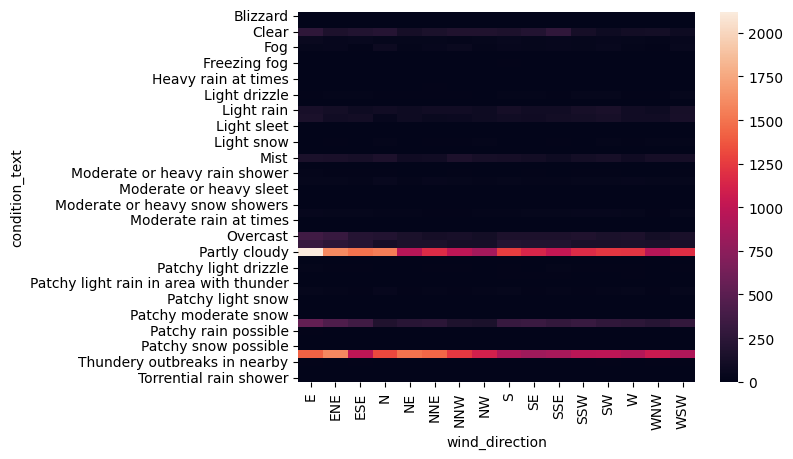

In [33]:
sb.heatmap(pd.crosstab(new_df['condition_text'], new_df['wind_direction']))

In [37]:
ohe=OneHotEncoder(sparse_output=False)
le=LabelEncoder()

new_df['wind_direction']=ohe.fit_transform(new_df[['wind_direction']])
new_df['condition_text']=le.fit_transform(new_df['condition_text'])

In [38]:
new_df.head(5)

latitude  longitude  temperature_celsius  condition_text  wind_kph  \
0     34.52      69.18                 26.6              29      13.3   
1     41.33      19.82                 19.0              30      11.2   
2     36.76       3.05                 23.0              43      15.1   
3     42.50       1.52                  6.3              10      11.9   
4     -8.84      13.23                 26.0              30      13.0   

   wind_degree  wind_direction  pressure_mb  precip_mm  humidity  ...  \
0          338             0.0       1012.0        0.0        24  ...   
1          320             0.0       1012.0        0.1        94  ...   
2          280             0.0       1011.0        0.0        29  ...   
3          215             0.0       1007.0        0.3        61  ...   
4          150             0.0       1011.0        0.0        89  ...   

   uv_index  gust_kph  air_quality_Carbon_Monoxide  air_quality_Ozone  \
0       7.0      15.3                        277.0              103.0   
1       5.0      18.4                        193.6               97.3   
2       5.0      22.3                        540.7               12.2   
3       2.0      13.7                        170.2               64.4   
4       8.0      20.2                       2964.0               19.0   

   air_quality_Nitrogen_dioxide  air_quality_Sulphur_dioxide  \
0                           1.1                          0.2   
1                           0.9                          0.1   
2                          65.1                         13.4   
3                           1.6                          0.2   
4                          72.7                         31.5   

   air_quality_PM2.5  air_quality_PM10  air_quality_us-epa-index  \
0                8.4              26.6                         1   
1                1.1               2.0                         1   
2               10.4              18.4                         1   
3                0.7               0.9                         1   
4              183.4             262.3                         5   

   air_quality_gb-defra-index  
0                           1  
1                           1  
2                           1  
3                           1  
4                          10  

[5 rows x 23 columns]

OUTLIER DETECTION

<Axes: ylabel='temperature_celsius'>

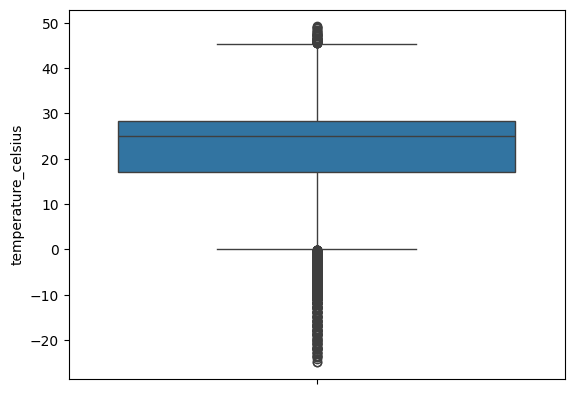

In [39]:
sb.boxplot(new_df['temperature_celsius'])

In [40]:
percentile25=new_df['temperature_celsius'].quantile(0.25)
percentile75=new_df['temperature_celsius'].quantile(0.75)
iqr=percentile75-percentile25

upper_limit=percentile75+(1.5*iqr)
lower_limit=percentile25-(1.5*iqr)

print(upper_limit)
print(lower_limit)

45.5
-0.09999999999999787


In [43]:
new_df['temperature_celsius']=np.where(new_df['temperature_celsius']>upper_limit, upper_limit, new_df['temperature_celsius'])
new_df['temperature_celsius']=np.where(new_df['temperature_celsius']<lower_limit, lower_limit, new_df['temperature_celsius'])

<Axes: ylabel='temperature_celsius'>

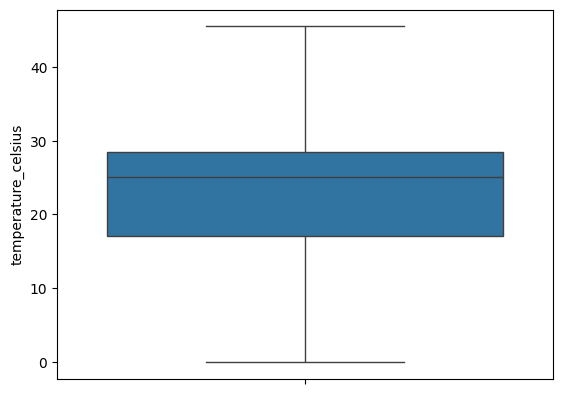

In [44]:
sb.boxplot(new_df['temperature_celsius'])

<Axes: ylabel='wind_kph'>

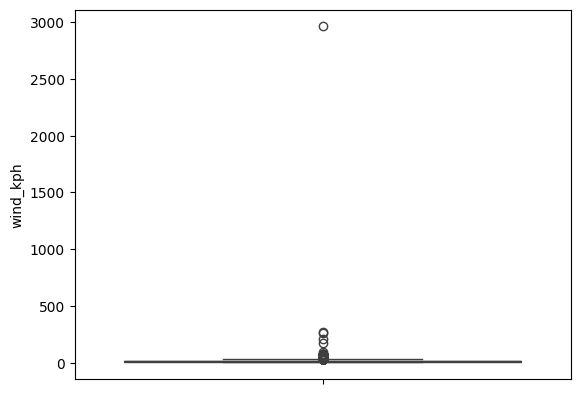

In [46]:
sb.boxplot(new_df['wind_kph'])

In [45]:
percentile25=new_df['wind_kph'].quantile(0.25)
percentile75=new_df['wind_kph'].quantile(0.75)
iqr=percentile75-percentile25

upper_limit=percentile75+(1.5*iqr)
lower_limit=percentile25-(1.5*iqr)

print(upper_limit)
print(lower_limit)

36.25
-11.349999999999998


In [47]:
new_df['wind_kph']=np.where(new_df['wind_kph']>upper_limit, upper_limit, new_df['wind_kph'])
new_df['wind_kph']=np.where(new_df['wind_kph']<lower_limit, lower_limit, new_df['wind_kph'])

<Axes: ylabel='wind_kph'>

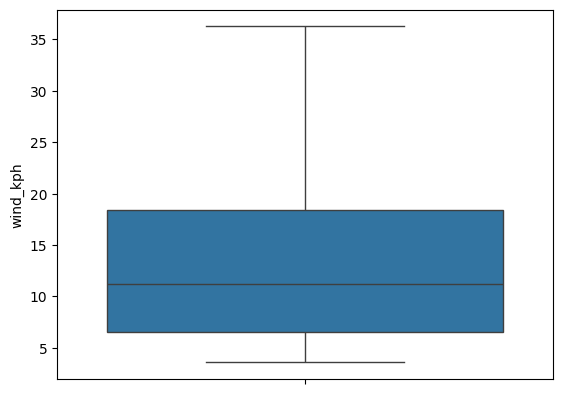

In [48]:
sb.boxplot(new_df['wind_kph'])

<Axes: ylabel='pressure_mb'>

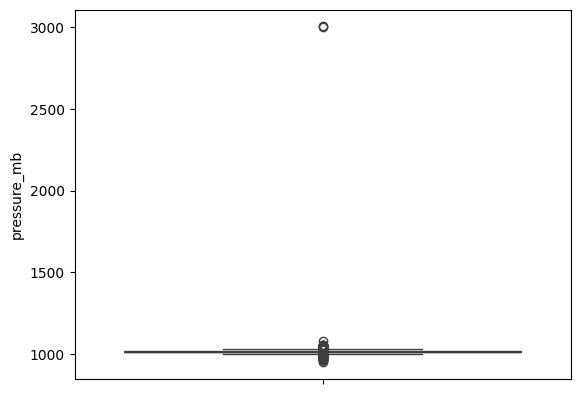

In [49]:
sb.boxplot(new_df['pressure_mb'])

In [51]:
percentile25=new_df['pressure_mb'].quantile(0.25)
percentile75=new_df['pressure_mb'].quantile(0.75)
iqr=percentile75-percentile25

upper_limit=percentile75+(1.5*iqr)
lower_limit=percentile25-(1.5*iqr)

print(upper_limit)
print(lower_limit)

1030.0
998.0


In [53]:
new_df['pressure_mb']=np.where(new_df['pressure_mb']>upper_limit, upper_limit, new_df['pressure_mb'])
new_df['pressure_mb']=np.where(new_df['pressure_mb']<lower_limit, lower_limit, new_df['pressure_mb'])

<Axes: ylabel='pressure_mb'>

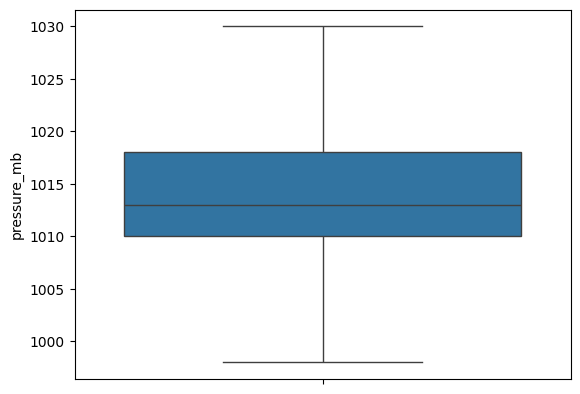

In [54]:
sb.boxplot(new_df['pressure_mb'])

<Axes: ylabel='precip_mm'>

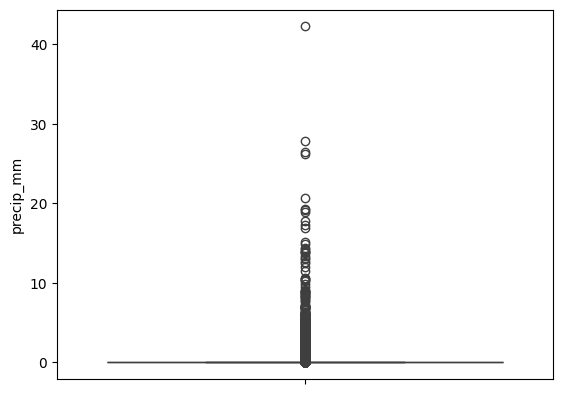

In [55]:
sb.boxplot(new_df['precip_mm'])

In [56]:
percentile25=new_df['precip_mm'].quantile(0.25)
percentile75=new_df['precip_mm'].quantile(0.75)
iqr=percentile75-percentile25

upper_limit=percentile75+(1.5*iqr)
lower_limit=percentile25-(1.5*iqr)

print(upper_limit)
print(lower_limit)

0.075
-0.045


In [57]:
new_df['precip_mm']=np.where(new_df['precip_mm']>upper_limit, upper_limit, new_df['precip_mm'])
new_df['precip_mm']=np.where(new_df['precip_mm']<lower_limit, lower_limit, new_df['precip_mm'])

<Axes: ylabel='precip_mm'>

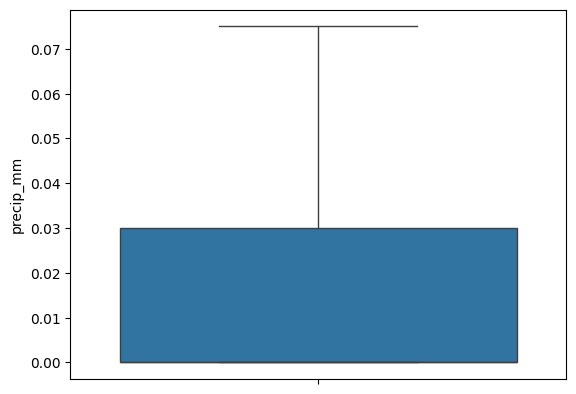

In [58]:
sb.boxplot(new_df['precip_mm'])

<Axes: ylabel='humidity'>

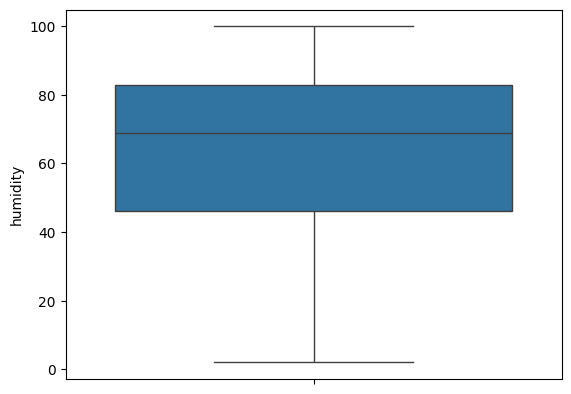

In [59]:
sb.boxplot(new_df['humidity'])

<Axes: ylabel='uv_index'>

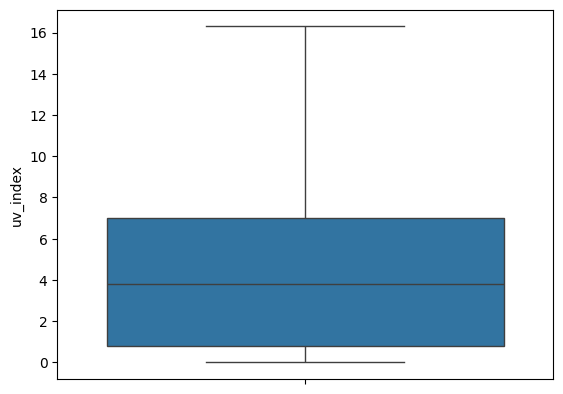

In [60]:
sb.boxplot(new_df['uv_index'])

In [66]:
new_df.corrwith(new_df['condition_text'])

latitude                        0.039527
longitude                       0.013191
temperature_celsius             0.209805
condition_text                  1.000000
wind_kph                        0.080824
wind_degree                    -0.022419
wind_direction                 -0.007650
pressure_mb                     0.022669
precip_mm                      -0.204675
humidity                       -0.466731
cloud                          -0.390027
feels_like_celsius              0.166211
visibility_km                   0.193302
uv_index                        0.362807
gust_kph                       -0.000208
air_quality_Carbon_Monoxide    -0.078371
air_quality_Ozone               0.226154
air_quality_Nitrogen_dioxide   -0.082416
air_quality_Sulphur_dioxide    -0.019834
air_quality_PM2.5               0.021542
air_quality_PM10                0.087787
air_quality_us-epa-index        0.057713
air_quality_gb-defra-index      0.052904
dtype: float64

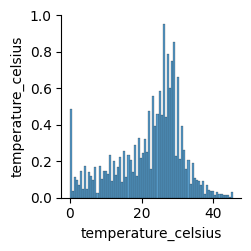

In [71]:
sb.pairplot(new_df[['temperature_celsius']])

<Axes: xlabel='temperature_celsius', ylabel='Count'>

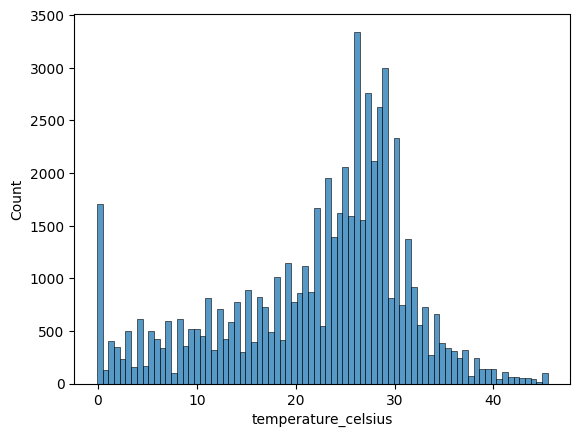

In [72]:
sb.histplot(new_df['temperature_celsius'])

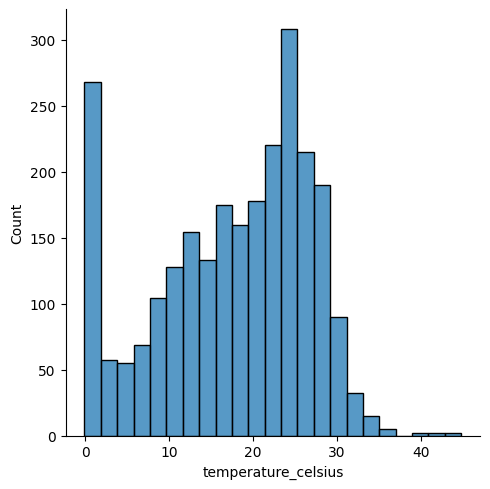

In [76]:
sb.displot(new_df[new_df['condition_text']==2]['temperature_celsius'])

<Axes: xlabel='temperature_celsius', ylabel='wind_kph'>

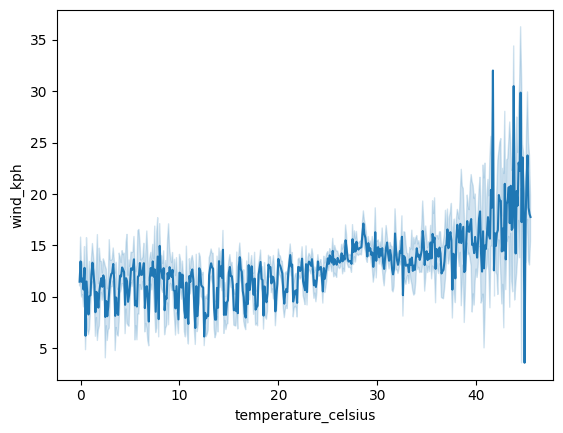

In [78]:
sb.lineplot(x=new_df['temperature_celsius'], y=new_df['wind_kph'])

<Axes: xlabel='temperature_celsius', ylabel='precip_mm'>

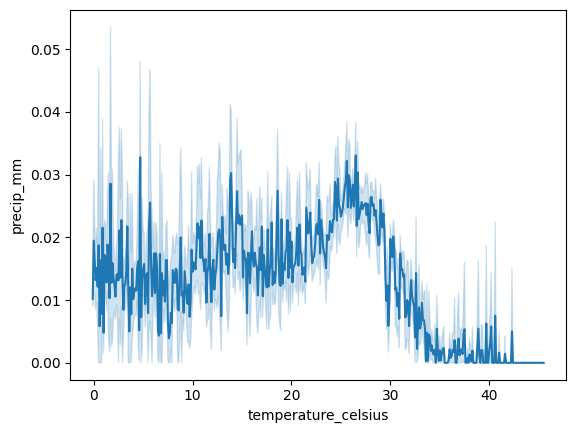

In [79]:
sb.lineplot(x=new_df['temperature_celsius'], y=new_df['precip_mm'])

In [81]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [86]:
x=new_df.drop(columns='condition_text', axis=1)
y=new_df['condition_text']

In [87]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=2)

In [88]:
x_train=x_train.values
x_test=x_test.values

In [89]:
scaler=StandardScaler()

In [90]:
scaled_x_train=scaler.fit_transform(x_train)
scaled_x_test=scaler.transform(x_test)

In [91]:
rf=RandomForestClassifier()
rf.fit(scaled_x_train, y_train)
y_pred=rf.predict(scaled_x_test)

In [92]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [93]:
acc_score=accuracy_score(y_test, y_pred)
print(acc_score)

0.8833738576339398


In [94]:
conf_matix=confusion_matrix(y_test, y_pred)
print(conf_matix)

[[  1   0   0 ...   0   0   0]
 [  0   2   0 ...   0   0   0]
 [  0   0 485 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   1   0]
 [  0   0   0 ...   0   0   0]]


In [95]:
class_report=classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.67      0.67      0.67         3
           2       0.94      0.94      0.94       515
           3       0.98      0.53      0.69       112
           4       0.93      0.78      0.85       136
           6       0.60      0.38      0.46         8
           7       1.00      0.25      0.40         4
           8       0.00      0.00      0.00         2
           9       0.50      0.73      0.59        11
          10       0.72      0.46      0.57        56
          11       0.00      0.00      0.00        10
          12       0.51      0.31      0.39       316
          13       0.74      0.60      0.66       315
          14       0.67      0.40      0.50         5
          15       0.00      0.00      0.00         2
          16       0.30      0.09      0.14        33
          17       0.00      0.00      0.00        10
          18       0.78    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



FINE TUNING USING OPTUNA

In [96]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 9.4 MB/s eta 0:00:00


In [97]:
import optuna

In [98]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=2)
scale=StandardScaler()
x_train=scale.fit_transform(x_train)
x_test=scale.transform(x_test)

In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [100]:
def objective(trial):
    n_estimators=trial.suggest_int('n_estimators', 50, 200)
    max_depth=trial.suggest_int('max_depth', 3, 20)
    min_samples_split=trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf=trial.suggest_int('min_samples_leaf', 1, 10)
    model=RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )

    score=cross_val_score(model, x_train, y_train, cv=3, scoring='accuracy').mean()

    return score


In [101]:
study=optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler())
study.optimize(objective, n_trials=50)

[I 2025-03-19 20:45:38,741] A new study created in memory with name: no-name-4d958d13-909d-4523-ad2d-1b24f3cdee77
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=3.

[I 2025-03-19 20:46:12,843] Trial 0 finished with value: 0.8586131723472938 and parameters: {'n_estimators': 137, 'max_depth': 18, 'min_samples_split': 3, 'min_samples_leaf': 10}. Best is trial 0 with value: 0.8586131723472938.
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=3.

[I 2025-03-19 20:46:42,978] Trial 1 finished with value: 0.8581939378694504 and parameters: {'n_estimators': 129, 'max_depth': 15, 'min_samples_split': 4, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.8586131723472938.
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: 

In [102]:
print(f'Best trial accuracy: {study.best_trial.value}')
print(f'Best hyperparameters: {study.best_trial.params}')

Best trial accuracy: 0.8805810589862911
Best hyperparameters: {'n_estimators': 182, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 1}


In [103]:
from sklearn.metrics import accuracy_score

best_model=RandomForestClassifier(**study.best_trial.params, random_state=42)
best_model.fit(scaled_x_train, y_train)
y_pred = best_model.predict(scaled_x_test)
test_accuracy = accuracy_score(y_test, y_pred)

print(f'Test Accuracy with best hyperparameters: {test_accuracy:.2f}')

Test Accuracy with best hyperparameters: 0.88


DATA AUGMENTATION DUE TO CLASS IMBALANCE

In [104]:
!pip install imbalanced-learn

In [105]:
from imblearn.over_sampling import SMOTE

In [106]:
x=new_df.drop(columns='condition_text', axis=1)
y=new_df['condition_text']

In [114]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE

class_counts = pd.Series(y).value_counts()

singleton_classes = class_counts[class_counts == 1].index
if not singleton_classes.empty:
    print("Warning: The following classes have only one sample and will be removed:", list(singleton_classes))
    mask = ~pd.Series(y).isin(singleton_classes)
    x_filtered = x[mask]
    y_filtered = y[mask]
else:
    x_filtered = x
    y_filtered = y

min_count = pd.Series(y_filtered).value_counts().min()

k_neighbors = min(5, min_count - 1) if min_count > 1 else 1
print(f"Using k_neighbors={k_neighbors} based on minimum class sample count={min_count}")

smote = SMOTE(random_state=42, k_neighbors=k_neighbors)
x_resampled, y_resampled = smote.fit_resample(x_filtered, y_filtered)

print("Resampled class distribution:")
print(pd.Series(y_resampled).value_counts())


Using k_neighbors=1 based on minimum class sample count=2
Resampled class distribution:
condition_text
29    19933
30    19933
43    19933
10    19933
2     19933
28    19933
21    19933
34    19933
4     19933
35    19933
39    19933
12    19933
18    19933
3     19933
44    19933
25    19933
13    19933
26    19933
20    19933
8     19933
33    19933
32    19933
45    19933
40    19933
19    19933
7     19933
46    19933
6     19933
24    19933
14    19933
0     19933
27    19933
16    19933
15    19933
11    19933
9     19933
1     19933
31    19933
17    19933
22    19933
36    19933
38    19933
5     19933
23    19933
37    19933
Name: count, dtype: int64


In [115]:
x_train, x_test, y_train, y_test=train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=2)

In [116]:
scale=StandardScaler()
x_train=scale.fit_transform(x_train)
x_test=scale.transform(x_test)

In [117]:
from sklearn.metrics import accuracy_score

best_model=RandomForestClassifier(**study.best_trial.params, random_state=42)
best_model.fit(x_train, y_train)
y_pred=best_model.predict(x_test)
test_accuracy=accuracy_score(y_test, y_pred)

print(f'Test Accuracy with best hyperparameters: {test_accuracy:.2f}')

Test Accuracy with best hyperparameters: 0.99


In [118]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3954
           1       1.00      1.00      1.00      3967
           2       0.99      1.00      0.99      3957
           3       0.97      1.00      0.99      3962
           4       1.00      1.00      1.00      3861
           5       1.00      1.00      1.00      4061
           6       1.00      1.00      1.00      3995
           7       1.00      1.00      1.00      4083
           8       1.00      1.00      1.00      4024
           9       1.00      1.00      1.00      3963
          10       1.00      1.00      1.00      4039
          11       1.00      1.00      1.00      3923
          12       0.95      0.97      0.96      3949
          13       0.95      0.99      0.97      4110
          14       1.00      1.00      1.00      3977
          15       1.00      1.00      1.00      3996
          16       1.00      1.00      1.00      3954
          17       1.00    